# **Higgs detection in LHC: Cut-based Selection**
SN:22048690

# Introduction



The Higgs boson decay channel *H → bb̄* poses a significant challenge due to the vast amount of background processes that can mimic the signal. In this analysis, the cut-based method was employed to isolate potential Higgs signal events from various backgrounds. Several kinematic and topological variables was used to identify which ones offer the greatest discriminating power between signal and background.

## Key Variables Used

- **dRBB**: The angular separation between the two b-jets, defined as  
  $[
    dR = \sqrt{(\Delta \eta)^2 + (\Delta \phi)^2}.
  ]$  
  Since $\eta$ (pseudorapidity) and $\phi$ (azimuthal angle) are dimensionless, $dRBB$ is also dimensionless.

- **pTB1**: The transverse momentum of the leading highest $p_T$ b-jet. Higher $p_T$ jets are often associated with higher-energy processes, making this variable useful for distinguishing signal from softer background jets.

- **Mtop**: The reconstructed mass of the top quark. This variable helps remove events containing real top quarks (e.g., $t\bar{t}$ production), thus reducing a significant source of background.

- **MET** (Missing Transverse Energy): Represents momentum imbalance in the transverse plane, typically due to neutrinos or detector effects. Signal events involving $W$ bosons can have non-trivial MET distributions, aiding in background suppression.

- **pTV**: The transverse momentum of the associated vector boson (e.g., $W$ or $Z$). Signal processes often involve a moderately high-$p_T$ vector boson recoiling against the Higgs, which helps discriminate from lower-energy backgrounds.

- **dYWH**: The rapidity difference between the $W$ boson and the Higgs candidate. Rapidities are dimensionless measures of velocity along the beam axis. A specific range of $\delta_Y$ values can be more indicative of signal topologies.

By exploring these variables individually (“one‐variable trials”) and subsequently combining the most effective ones, we aim to maximise the sensitivity $S/\sqrt{B}$ of our cut-based selection. This step-by-step approach begins with a baseline set of three variables, followed by a fourth-variable trial to check for additional gains in sensitivity. Finally, we compare the pre‐cut and post‐cut distributions to quantify how effectively the cuts isolate potential Higgs signal events.

# Coding Preparation

In [ ]:
# read data from github
from pathlib import Path

data_path = Path('../data-v2/VHbb_data_2jet.csv')
class_path = Path('ucl_masterclass.py')
if not data_path.exists():
    !wget -P ../data-v2/ https://raw.githubusercontent.com/nikitapond/in2HEP/master/data-v2/VHbb_data_2jet.csv
else:
    print("Data file already found")

if not class_path.exists():
    !wget https://raw.githubusercontent.com/nikitapond/in2HEP/master/notebooks/ucl_masterclass.py
else:
    print("Required custom classes already found")

Data file already found
Required custom classes already found


In [ ]:
# import all necessary mods
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from copy import deepcopy
from ucl_masterclass import *

# Data Check
  *We conducted an exploratory analysis of the signal and background distributions for each variable. This investigation guided the selection of candidate variables for the cut-based approach.*

In [ ]:
# check the availability of the csv file, set first row of data as the head
df = pd.read_csv(data_path, header=0)

# delete all the unnamed columns
df.columns = df.columns.map(str)
df_original = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df_original.head()

,nJ,EventNumber,sample,EventWeight,dYWH,MV1cJ3_cont,dPhiVBB,pTB2,nTags,mBB,...,mTW,dRBB,MET,Mtop,dPhiLBmin,MV1cJ3,Class,post_fit_weight,category,training_weight
0,2,135190,ggZllH125,0.000288,1.365255,-1.0,3.062447,30735.035156,2,224085.515625,...,37423.199219,3.022191,35582.070312,173959.187500,0.433436,0.2025,1.0,0.000288,VH,0.441960
1,2,158910,ggZllH125,0.000296,0.141515,-1.0,2.926018,21394.062500,2,128612.726562,...,32399.535156,2.095292,94344.554688,127825.226562,1.393339,0.2025,1.0,0.000296,VH,0.453550
2,2,116708,ggZllH125,0.000299,0.258997,-1.0,3.118855,107430.578125,2,117164.398438,...,28195.513672,1.003535,109446.429688,318686.750000,2.756902,0.2025,1.0,0.000299,VH,0.457858
3,2,117074,ggZllH125,0.000294,1.604908,-1.0,3.085443,48878.707031,2,118893.835938,...,47200.093750,1.181506,24177.300781,283867.406250,2.542176,0.2025,1.0,0.000294,VH,0.449803
4,2,114670,ggZllH125,0.000265,0.127030,-1.0,2.960442,23374.910156,2,128929.515625,...,4195.214844,1.826683,73605.992188,156267.296875,2.861569,0.2025,1.0,0.000265,VH,0.405355


In [ ]:
# check if NaN data exists
print(df_original.isnull().sum())

nJ                 0
EventNumber        0
sample             0
EventWeight        0
dYWH               0
MV1cJ3_cont        0
dPhiVBB            0
pTB2               0
nTags              0
mBB                0
MV1cB1             0
MV1cB2             0
pTV                0
MV1cB1_cont        0
nTrackJetsOR       0
pTB1               0
pTJ3               0
mBBJ               0
MV1cB2_cont        0
mTW                0
dRBB               0
MET                0
Mtop               0
dPhiLBmin          0
MV1cJ3             0
Class              0
post_fit_weight    0
category           0
training_weight    0
dtype: int64


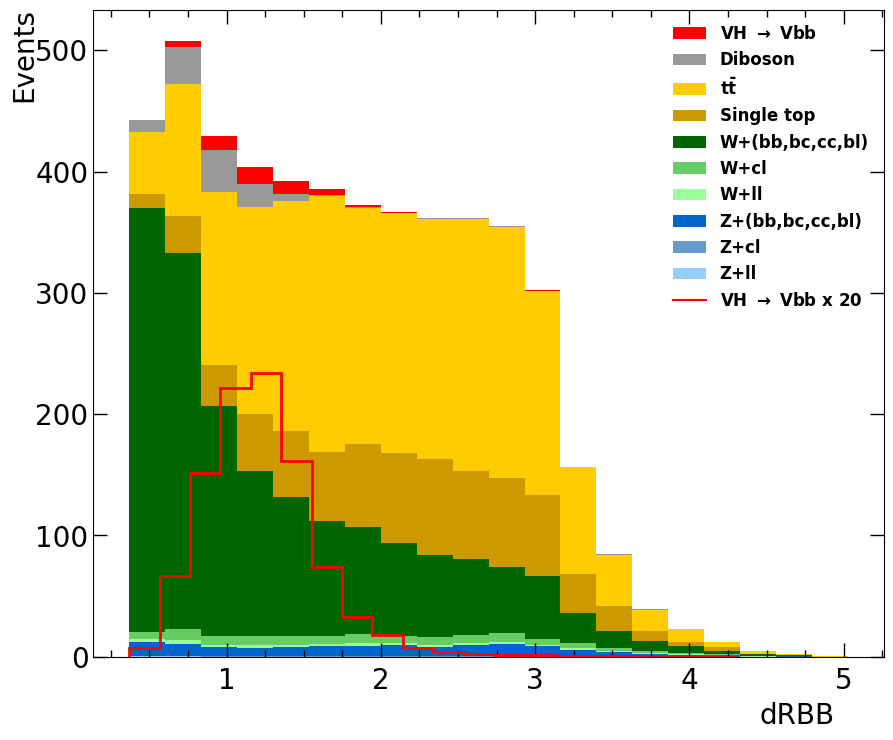

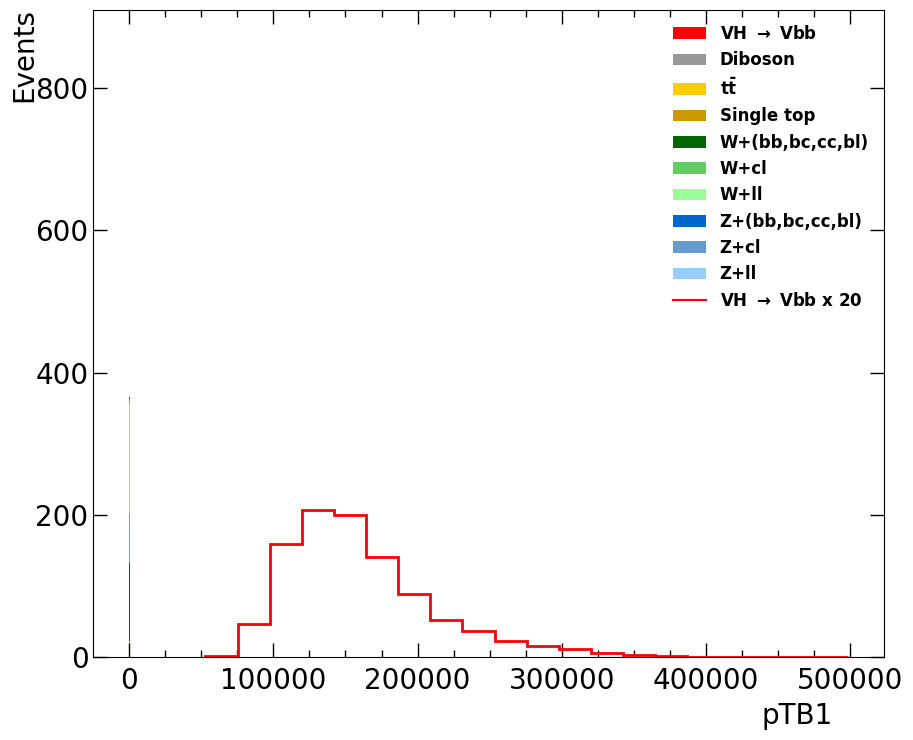

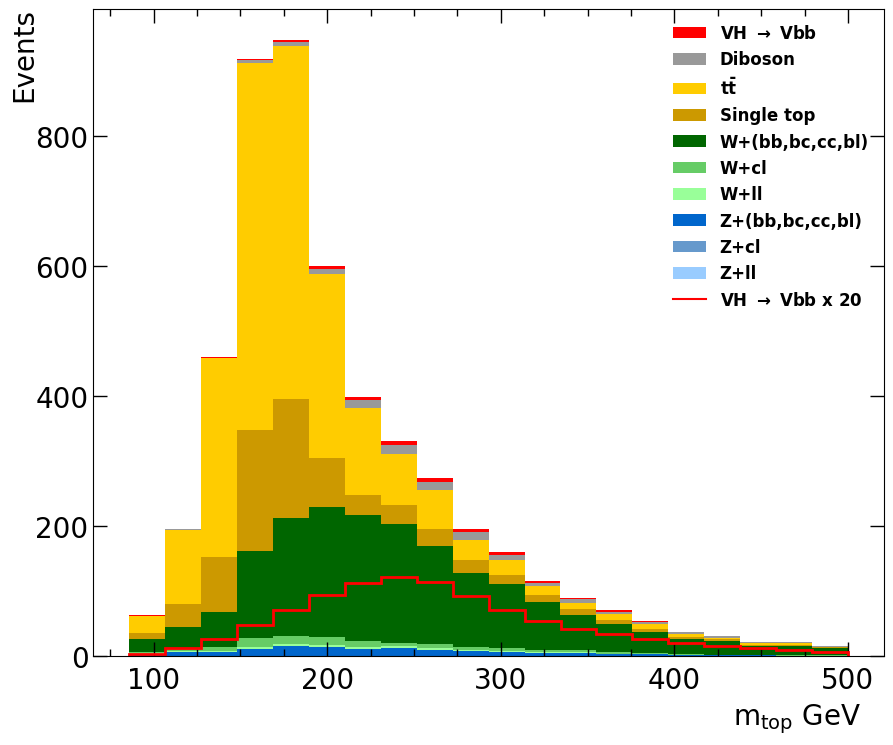

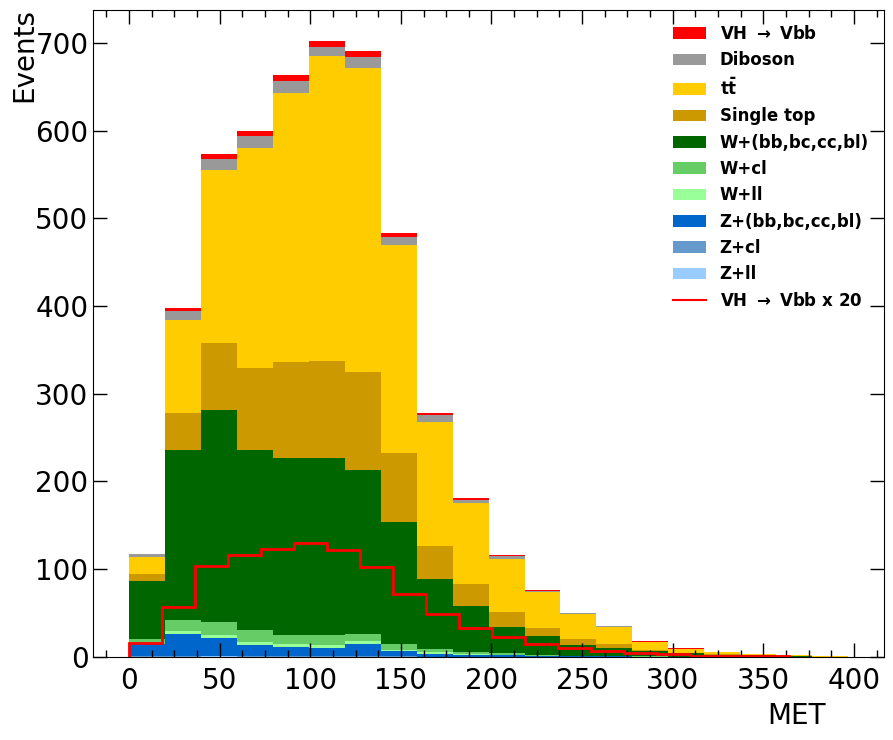

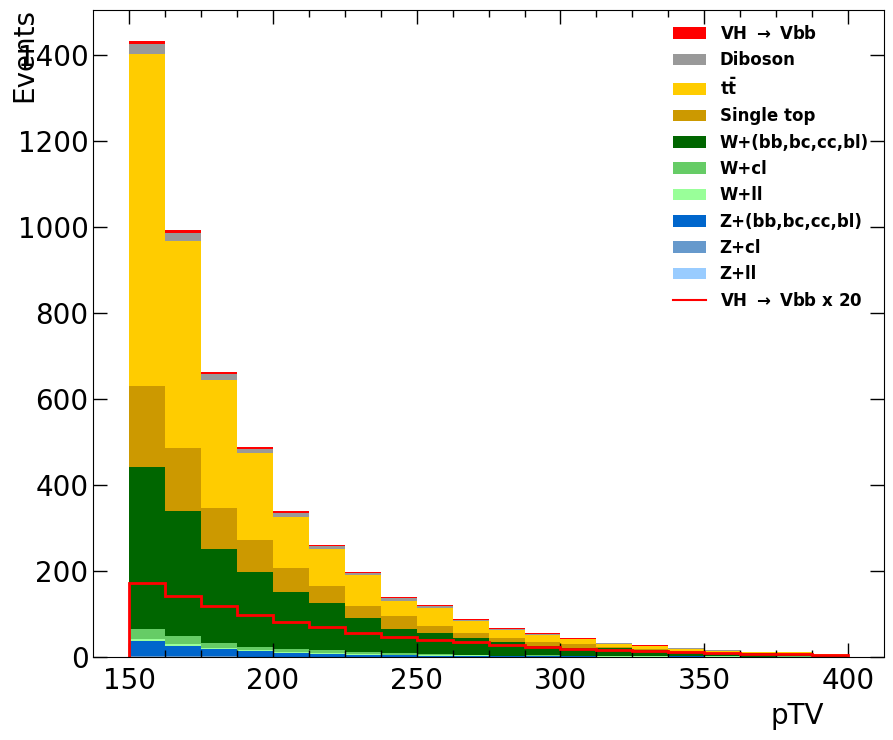

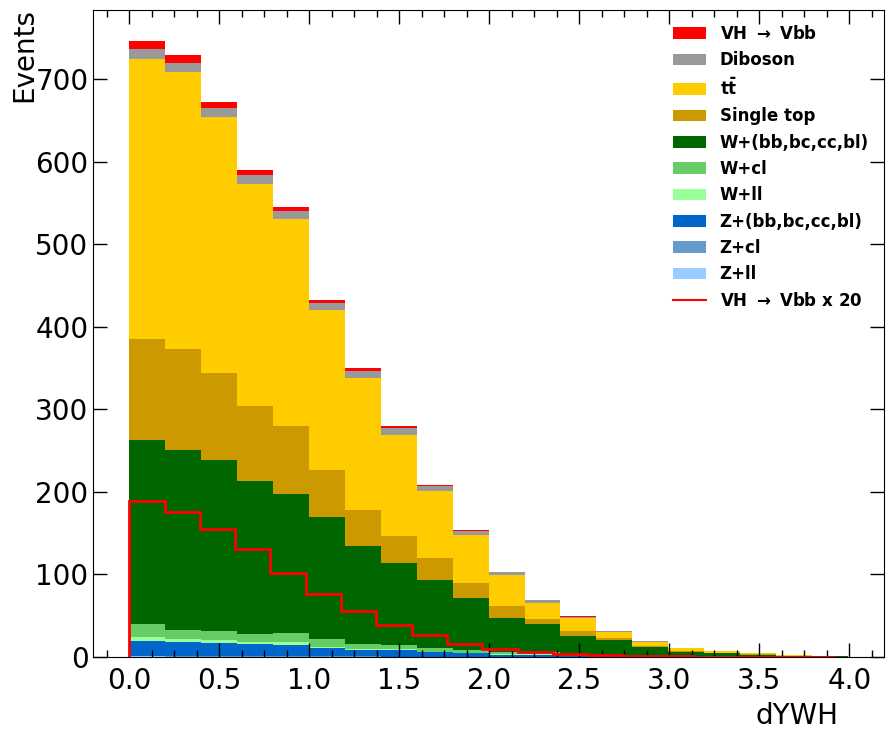

In [ ]:
# plot data for choosing suitable cut
plot_variable(df,'dRBB') # Draw the dRBB distribution
plot_variable(df,'pTB1') # Draw the pTB1 distribution
plot_variable(df,'Mtop') # Draw the Mtop distribution
plot_variable(df,'MET') # Draw the MET distribution
plot_variable(df,'pTV') # Draw the pTV distribution
plot_variable(df,'dYWH') # Draw the dYWH distribution

# create an empty array for one-variable cuts trial
best_results = []

# 1. One Variable Cut Based Analysis
*Each candidate variable was scanned over a range of threshold values to assess its individual impact on sensitivity. The optimal threshold for each variable was identified by finding the point where S/√B is maximised.*

## 1.1. Cut Base Using PTB1

Max snesitivity for is:1.5048662144419862
Corresponding pTB1 threshold is:90.0 GeV
--------------------------------------------
Max inverted snesitivity for is:1.2916350924449793
Corresponding pTB1 threshold is:198.0 GeV




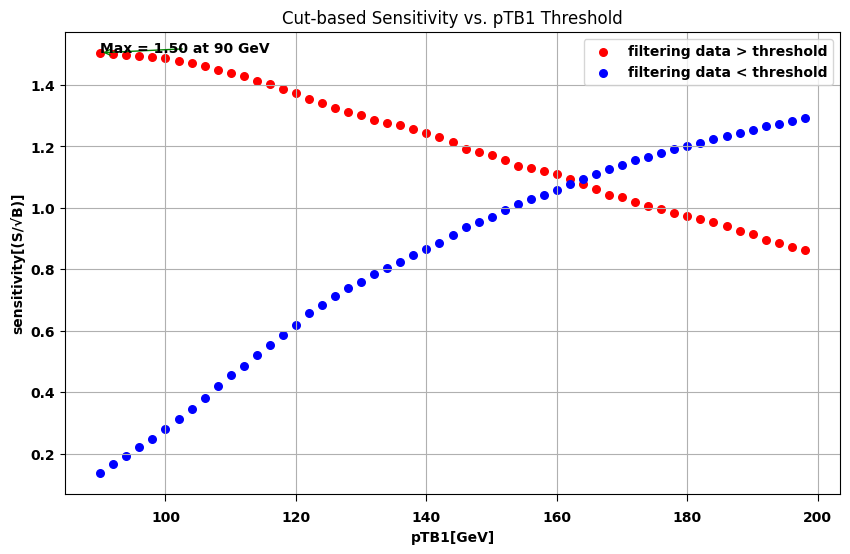

In [ ]:
def cutbase_snesitivity_pTB1(df):
  """
  using pTB1 as variable to explore sensitivity increased
  after applying cut with two different regions.

  Input:
  df: Dataframe containing pTB1 data needed
  Ouput:
  A plot showing the sensitivity vs cutting parameters
  """
  # create two empty arrays for storing sensitivity values
  sensitivity_pTB1 = []
  sensitivity_inv_pTB1 = []

  # create data set for pTB1
  pTB1_values = np.arange(90000,200000,2000)

  for i in pTB1_values:
    # copy data
    df_copy = df.copy()
    # filter data larger than threshold
    df_copy = df_copy.loc[df_copy['pTB1'] > i]
    sensitivity_pTB1.append(sensitivity_cut_based(df_copy))

  for i in pTB1_values:
    # copy data
    df_copy = df.copy()
    # filter data smaller than threshold
    df_copy = df_copy.loc[df_copy['pTB1'] < i]
    sensitivity_inv_pTB1.append(sensitivity_cut_based(df_copy))

  sensitivity_pTB1 = np.array(sensitivity_pTB1)
  sensitivity_inv_pTB1 = np.array(sensitivity_inv_pTB1)

  # filter useless data due to 0 background event
  indic_sensitivity_pTB1 = np.isfinite(sensitivity_pTB1)
  sensitivity_pTB1_filtered = sensitivity_pTB1[indic_sensitivity_pTB1]
  value_pTB1_filtered = pTB1_values[indic_sensitivity_pTB1]

  # filter useless data due to 0 background event for inverted
  indic_sensitivity_inv_pTB1 = np.isfinite(sensitivity_inv_pTB1)
  sensitivity_inv_pTB1_filtered = sensitivity_inv_pTB1[indic_sensitivity_inv_pTB1]
  value_pTB1_inv_filtered = pTB1_values[indic_sensitivity_inv_pTB1]

  # find the maximum sensitivity
  max_sensitivity_pTB1 = np.max(sensitivity_pTB1_filtered)
  max_sensitivity_thre_pTB1 = value_pTB1_filtered[np.argmax(sensitivity_pTB1_filtered)]

  # find the maximum sensitivity for inverted
  max_sensitivity_inv_pTB1 = np.max(sensitivity_inv_pTB1_filtered)
  max_sensitivity_thre_pTB1_inv = value_pTB1_inv_filtered[np.argmax(sensitivity_inv_pTB1_filtered)]

  print(f"Max snesitivity for is:{max_sensitivity_pTB1}")
  print(f"Corresponding pTB1 threshold is:{max_sensitivity_thre_pTB1/1e3} GeV")
  print("--------------------------------------------")
  print(f"Max inverted snesitivity for is:{max_sensitivity_inv_pTB1}")
  print(f"Corresponding pTB1 threshold is:{max_sensitivity_thre_pTB1_inv/1e3} GeV")
  print("\n")

  # plot sensitivity versus pTB1 data
  plt.figure(figsize=(10,6))

  # add a green arrow to point highest sensitivity
  plt.annotate(f"Max = {max_sensitivity_pTB1:.2f} at {max_sensitivity_thre_pTB1/1e3:.0f} GeV",
             xy=(max_sensitivity_thre_pTB1/1e3, max_sensitivity_pTB1),
             arrowprops=dict(arrowstyle="->", color='green'))

  plt.scatter(pTB1_values/1e3,sensitivity_pTB1,s=30,label='filtering data > threshold',color='red')
  plt.scatter(pTB1_values/1e3,sensitivity_inv_pTB1,s=30,label='filtering data < threshold',color='blue')
  plt.xlabel('pTB1[GeV]')
  plt.ylabel('sensitivity[(S/√B)]')
  plt.title('Cut-based Sensitivity vs. pTB1 Threshold')
  plt.legend()
  plt.grid(True)
  plt.show()

  best_results.append(("pTB1", max_sensitivity_pTB1, max_sensitivity_thre_pTB1,max_sensitivity_inv_pTB1,max_sensitivity_thre_pTB1_inv))

# call function to apply cuts
cutbase_snesitivity_pTB1(df_original)

## 1.2. Cut Base Using dRBB

/content/ucl_masterclass.py:537: RuntimeWarning: invalid value encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin
/content/ucl_masterclass.py:537: RuntimeWarning: divide by zero encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin


Max snesitivity for is:1.4990772856082444
Corresponding dRBB threshold is:0.0
--------------------------------------------
Max inverted snesitivity for is:1.868656914056315
Corresponding dRBB threshold is:1.3900000000000001




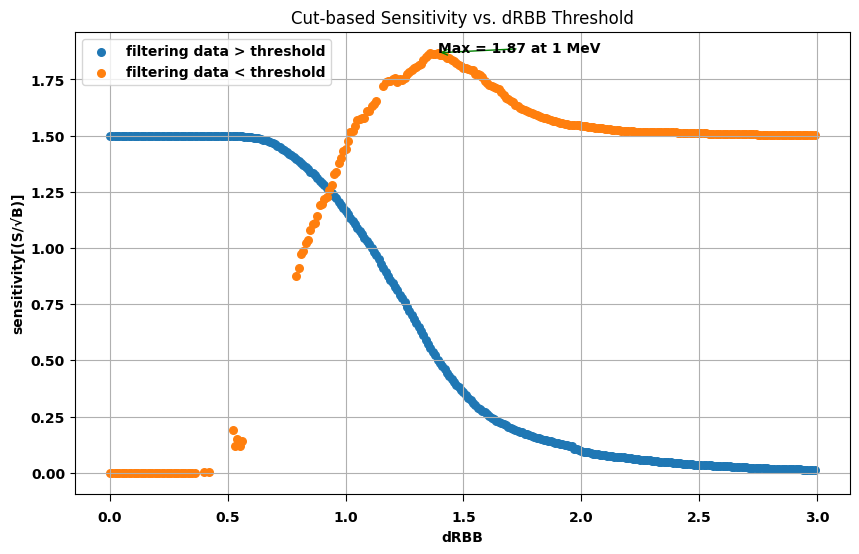

In [ ]:
def cutbase_snesitivity_dRBB(df):
  """
  using dRBB as variable to explore sensitivity increased
  after applying cut with two different regions.

  Input:
  df: Dataframe containing pTB1 data needed
  Ouput:
  A plot showing the sensitivity vs cutting parameters
  """
  # create two empty arrays for storing sensitivity values
  sensitivity_dRBB = []
  sensitivity_inv_dRBB = []

  # create data set for dRBB
  dRBB_values = np.arange(0,3,0.01)

  for i in dRBB_values:
    # copy data
    df_copy = df.copy()
    # filter data larger than threshold
    df_copy = df_copy.loc[df_copy['dRBB'] > i]
    sensitivity_dRBB.append(sensitivity_cut_based(df_copy))

  for i in dRBB_values:
    # copy data
    df_copy = df.copy()
    # filter data smaller than threshold
    df_copy = df_copy.loc[df_copy['dRBB'] < i]
    sensitivity_inv_dRBB.append(sensitivity_cut_based(df_copy))

  sensitivity_dRBB = np.array(sensitivity_dRBB)
  sensitivity_inv_dRBB = np.array(sensitivity_inv_dRBB)

  # filter useless data due to 0 background event
  indic_sensitivity_dRBB = np.isfinite(sensitivity_dRBB)
  sensitivity_dRBB_filtered = sensitivity_dRBB[indic_sensitivity_dRBB]
  value_dRBB_filtered = dRBB_values[indic_sensitivity_dRBB]

  # filter useless data due to 0 background event for inverted threshold
  indic_sensitivity_inv_dRBB = np.isfinite(sensitivity_inv_dRBB)
  sensitivity_inv_dRBB_filtered = sensitivity_inv_dRBB[indic_sensitivity_inv_dRBB]
  value_dRBB_inv_filtered = dRBB_values[indic_sensitivity_inv_dRBB]

  # find the maximum sensitivity
  max_sensitivity_dRBB = np.max(sensitivity_dRBB_filtered)
  max_sensitivity_thre_dRBB = value_dRBB_filtered[np.argmax(sensitivity_dRBB_filtered)]

  # find the maximum sensitivity for inverted
  max_sensitivity_inv_dRBB = np.max(sensitivity_inv_dRBB_filtered)
  max_sensitivity_thre_dRBB_inv = value_dRBB_inv_filtered[np.argmax(sensitivity_inv_dRBB_filtered)]


  # print maximum snesitivity and corresponding threshold
  print(f"Max snesitivity for is:{max_sensitivity_dRBB}")
  print(f"Corresponding dRBB threshold is:{max_sensitivity_thre_dRBB}")
  print("--------------------------------------------")
  print(f"Max inverted snesitivity for is:{max_sensitivity_inv_dRBB}")
  print(f"Corresponding dRBB threshold is:{max_sensitivity_thre_dRBB_inv}")
  print("\n")

  # plot sensitivity versus dRBB data
  plt.figure(figsize=(10,6))

  # add a green arrow to point highest sensitivity
  plt.annotate(f"Max = {max_sensitivity_inv_dRBB:.2f} at {max_sensitivity_thre_dRBB_inv:.0f} MeV",
             xy=(max_sensitivity_thre_dRBB_inv, max_sensitivity_inv_dRBB),
             arrowprops=dict(arrowstyle="->", color='green'))

  plt.scatter(dRBB_values,sensitivity_dRBB,s=30,label='filtering data > threshold')
  plt.scatter(dRBB_values,sensitivity_inv_dRBB,s=30,label='filtering data < threshold')
  plt.xlabel('dRBB')
  plt.ylabel('sensitivity[(S/√B)]')
  plt.title('Cut-based Sensitivity vs. dRBB Threshold')
  plt.legend()
  plt.grid(True)
  plt.show()

  best_results.append(("dRBB", max_sensitivity_dRBB, max_sensitivity_thre_dRBB,max_sensitivity_inv_dRBB,max_sensitivity_thre_dRBB_inv))
# call function to apply cuts
cutbase_snesitivity_dRBB(df_original)

## 1.3. Cut Base Using MET

Max snesitivity is:1.4991014864191343
Corresponding MET threshold is:2000
--------------------------------------------
Max inverted snesitivity for is:1.4267405960151383
Corresponding MET threshold is:198000




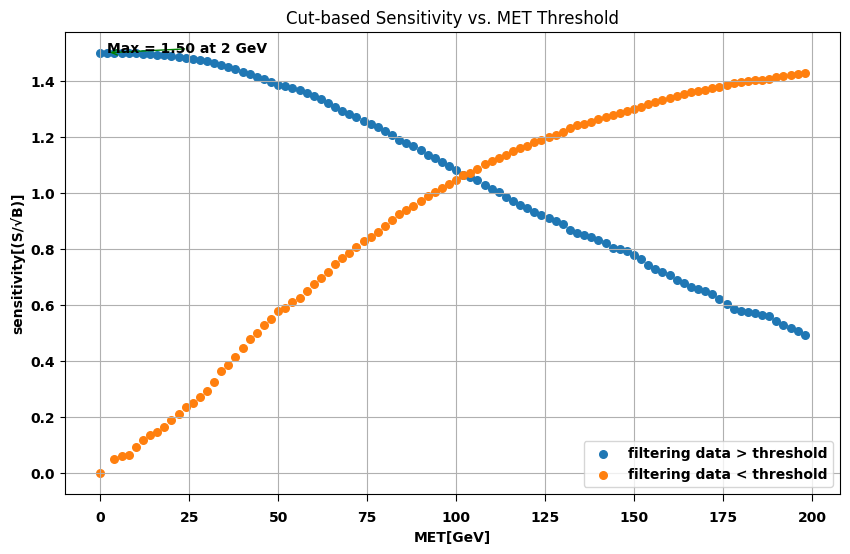

In [ ]:
def cutbase_snesitivity_MET(df):
  """
  using MET as variable to explore sensitivity increased
  after applying cut with two different regions.

  Input:
  df: Dataframe containing MET data needed
  Ouput:
  A plot showing the sensitivity vs cutting parameters
  """
  # create two empty arrays for storing sensitivity values
  sensitivity_MET = []
  sensitivity_inv_MET= []

  # create data set for dRBB
  MET_values = np.arange(0,200000,2000)

  for i in MET_values:
    # copy data
    df_copy = df.copy()
    # filter data larger than threshold
    df_copy = df_copy.loc[df_copy['MET'] > i]
    sensitivity_MET.append(sensitivity_cut_based(df_copy))

  for i in MET_values:
    # copy data
    df_copy = df.copy()
    # filter data smaller than threshold
    df_copy = df_copy.loc[df_copy['MET'] < i]
    sensitivity_inv_MET.append(sensitivity_cut_based(df_copy))

  sensitivity_MET = np.array(sensitivity_MET)
  sensitivity_inv_MET = np.array(sensitivity_inv_MET)

  # filter useless data due to 0 background event
  indic_sensitivity_MET = np.isfinite(sensitivity_MET)
  sensitivity_MET_filtered = sensitivity_MET[indic_sensitivity_MET]
  value_MET_filtered = MET_values[indic_sensitivity_MET]

  # filter useless data due to 0 background event for inverted threshold
  indic_sensitivity_inv_MET = np.isfinite(sensitivity_inv_MET)
  sensitivity_inv_MET_filtered = sensitivity_inv_MET[indic_sensitivity_inv_MET]
  value_MET_inv_filtered = MET_values[indic_sensitivity_inv_MET]

  # find the maximum sensitivity
  max_sensitivity_MET = np.max(sensitivity_MET_filtered)
  max_sensitivity_thre_MET = value_MET_filtered[np.argmax(sensitivity_MET_filtered)]

  # find the maximum sensitivity for inverted
  max_sensitivity_inv_MET = np.max(sensitivity_inv_MET_filtered)
  max_sensitivity_thre_MET_inv = value_MET_inv_filtered[np.argmax(sensitivity_inv_MET_filtered)]


  # print maximum snesitivity and corresponding threshold
  print(f"Max snesitivity is:{max_sensitivity_MET}")
  print(f"Corresponding MET threshold is:{max_sensitivity_thre_MET}")
  print("--------------------------------------------")
  print(f"Max inverted snesitivity for is:{max_sensitivity_inv_MET}")
  print(f"Corresponding MET threshold is:{max_sensitivity_thre_MET_inv}")
  print("\n")

  # plot sensitivity versus MET data
  plt.figure(figsize=(10,6))

  # add a green arrow to point highest sensitivity
  plt.annotate(f"Max = {max_sensitivity_MET:.2f} at {(max_sensitivity_thre_MET/1e3):.0f} GeV",
             xy=(max_sensitivity_thre_MET/1e3, max_sensitivity_MET),
             arrowprops=dict(arrowstyle="->", color='green'))

  plt.scatter(MET_values/1e3,sensitivity_MET,s=30,label='filtering data > threshold')
  plt.scatter(MET_values/1e3,sensitivity_inv_MET,s=30,label='filtering data < threshold')
  plt.xlabel('MET[GeV]')
  plt.ylabel('sensitivity[(S/√B)]')
  plt.title('Cut-based Sensitivity vs. MET Threshold')
  plt.legend()
  plt.grid(True)
  plt.show()

  best_results.append(("MET", max_sensitivity_MET, max_sensitivity_thre_MET,max_sensitivity_inv_MET,max_sensitivity_thre_MET_inv))
# call function to apply cuts
cutbase_snesitivity_MET(df_original)

## 1.4. Cut Base Using pTV

Max sensitivityis: 1.5219585629060768
Corresponding pTV threshold is: 170000
--------------------------------------------
Max inverted sensitivity is: 1.215888874689295
Corresponding pTV threshold is: 249000




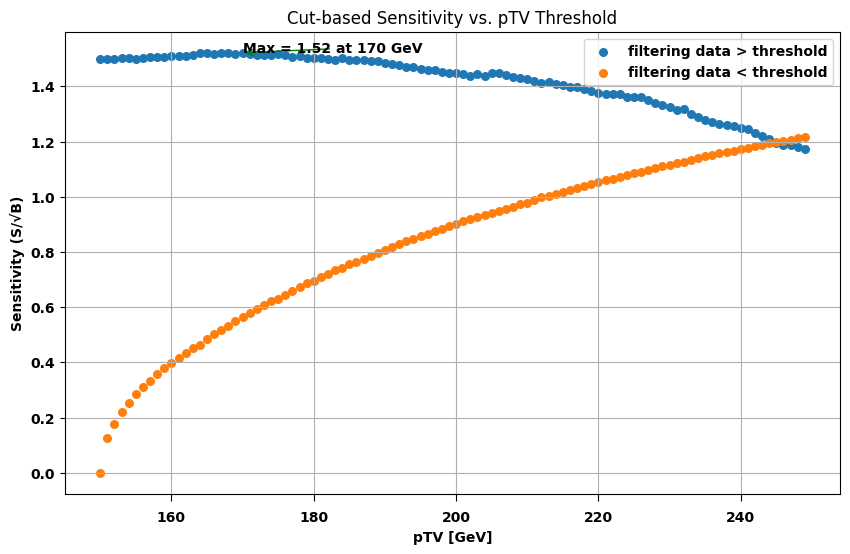

In [ ]:
def cutbase_snesitivity_pTV(df):
  """
  using pTV as variable to explore sensitivity increased
  after applying cut with two different regions.

  Input:
    df: Dataframe containing pTV data needed
  Output:
    A plot showing the sensitivity vs cutting parameters
  """
  # create two empty arrays for storing sensitivity values
  sensitivity_pTV = []
  sensitivity_inv_pTV = []

  # create data set for pTV
  pTV_values = np.arange(150000, 250000, 1000)

  for i in pTV_values:
    # copy data
    df_copy = df.copy()
    # filter data larger than threshold
    df_copy = df_copy.loc[df_copy['pTV'] > i]
    sensitivity_pTV.append(sensitivity_cut_based(df_copy)) # Pass df_copy here

  for i in pTV_values:
    # copy data
    df_copy = df.copy()
    # filter data smaller than threshold
    df_copy = df_copy.loc[df_copy['pTV'] < i]
    sensitivity_inv_pTV.append(sensitivity_cut_based(df_copy)) # Pass df_copy here

  sensitivity_pTV = np.array(sensitivity_pTV)
  sensitivity_inv_pTV = np.array(sensitivity_inv_pTV)

  # filter useless data due to 0 background event
  indic_sensitivity_pTV = np.isfinite(sensitivity_pTV)
  sensitivity_pTV_filtered = sensitivity_pTV[indic_sensitivity_pTV]
  value_pTV_filtered = pTV_values[indic_sensitivity_pTV]

  # filter useless data due to 0 background event for inverted threshold
  indic_sensitivity_inv_pTV = np.isfinite(sensitivity_inv_pTV)
  sensitivity_inv_pTV_filtered = sensitivity_inv_pTV[indic_sensitivity_inv_pTV]
  value_pTV_inv_filtered = pTV_values[indic_sensitivity_inv_pTV]

  # find the maximum sensitivity
  max_sensitivity_pTV = np.max(sensitivity_pTV_filtered)
  max_sensitivity_thre_pTV = value_pTV_filtered[np.argmax(sensitivity_pTV_filtered)]

  # find the maximum sensitivity for inverted
  max_sensitivity_inv_pTV = np.max(sensitivity_inv_pTV_filtered)
  max_sensitivity_thre_pTV_inv = value_pTV_inv_filtered[np.argmax(sensitivity_inv_pTV_filtered)]

  # print maximum sensitivity and corresponding threshold
  print(f"Max sensitivityis: {max_sensitivity_pTV}")
  print(f"Corresponding pTV threshold is: {max_sensitivity_thre_pTV}")
  print("--------------------------------------------")
  print(f"Max inverted sensitivity is: {max_sensitivity_inv_pTV}")
  print(f"Corresponding pTV threshold is: {max_sensitivity_thre_pTV_inv}")
  print("\n")

  # plot sensitivity versus pTV data
  plt.figure(figsize=(10, 6))

  # add a green arrow to point highest sensitivity
  plt.annotate(f"Max = {max_sensitivity_pTV:.2f} at {(max_sensitivity_thre_pTV/1e3):.0f} GeV",
             xy=(max_sensitivity_thre_pTV/1e3, max_sensitivity_pTV),
             arrowprops=dict(arrowstyle="->", color='green'))

  plt.scatter(pTV_values/1e3, sensitivity_pTV, s=30, label='filtering data > threshold')
  plt.scatter(pTV_values/1e3, sensitivity_inv_pTV, s=30, label='filtering data < threshold')
  plt.xlabel('pTV [GeV]')
  plt.ylabel('Sensitivity (S/√B)')
  plt.title('Cut-based Sensitivity vs. pTV Threshold')
  plt.legend()
  plt.grid(True)
  plt.show()

  best_results.append(("pTV", max_sensitivity_pTV, max_sensitivity_thre_pTV,max_sensitivity_inv_pTV,max_sensitivity_thre_pTV_inv))
# call function to apply cuts
cutbase_snesitivity_pTV(df_original)

## 1.5. Cut Base Using Mtop

Max sensitivity is: 1.8326709857279506
Corresponding Mtop threshold is: 209000
--------------------------------------------
Max inverted sensitivity is: 1.1377844852273018
corresponding Mtop threshold is: 299000




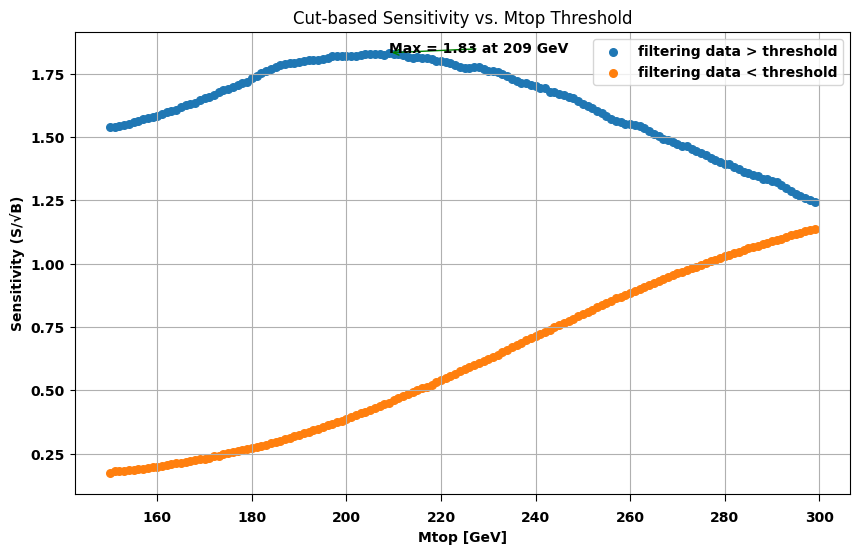

In [ ]:
def cutbase_sensitivity_Mtop(df):
  """
  using Mtop as variable to explore sensitivity increased
  after applying cut with two different regions.

  Input:
    df: Dataframe containing Mtop data needed
  Output:
    A plot showing the sensitivity vs cutting parameters
  """
  # create two empty arrays for storing sensitivity values
  sensitivity_Mtop = []
  sensitivity_inv_Mtop = []

  # create data set for Mtop
  Mtop_values = np.arange(150000, 300000, 1000)

  for i in Mtop_values:
    # copy data
    df_copy = df.copy()
    # filter data larger than threshold
    df_copy = df_copy.loc[df_copy['Mtop'] > i]
    sensitivity_Mtop.append(sensitivity_cut_based(df_copy)) # Pass df_copy here

  for i in Mtop_values:
    # copy data
    df_copy = df.copy()
    # filter data smaller than threshold
    df_copy = df_copy.loc[df_copy['Mtop'] < i]
    sensitivity_inv_Mtop.append(sensitivity_cut_based(df_copy)) # Pass df_copy here

  sensitivity_Mtop = np.array(sensitivity_Mtop)
  sensitivity_inv_Mtop = np.array(sensitivity_inv_Mtop)

  # filter useless data due to 0 background event
  indic_sensitivity_Mtop = np.isfinite(sensitivity_Mtop)
  sensitivity_Mtop_filtered = sensitivity_Mtop[indic_sensitivity_Mtop]
  value_Mtop_filtered = Mtop_values[indic_sensitivity_Mtop]

  # filter useless data due to 0 background event for inverted threshold
  indic_sensitivity_inv_Mtop = np.isfinite(sensitivity_inv_Mtop)
  sensitivity_inv_Mtop_filtered = sensitivity_inv_Mtop[indic_sensitivity_inv_Mtop]
  value_Mtop_inv_filtered = Mtop_values[indic_sensitivity_inv_Mtop]

  # find the maximum sensitivity
  max_sensitivity_Mtop = np.max(sensitivity_Mtop_filtered)
  max_sensitivity_thre_Mtop = value_Mtop_filtered[np.argmax(sensitivity_Mtop_filtered)]

  # find the maximum sensitivity for inverted
  max_sensitivity_inv_Mtop = np.max(sensitivity_inv_Mtop_filtered)
  max_sensitivity_thre_Mtop_inv = value_Mtop_inv_filtered[np.argmax(sensitivity_inv_Mtop_filtered)]

  # print maximum sensitivity and corresponding threshold
  print(f"Max sensitivity is: {max_sensitivity_Mtop}")
  print(f"Corresponding Mtop threshold is: {max_sensitivity_thre_Mtop}")
  print("--------------------------------------------")
  print(f"Max inverted sensitivity is: {max_sensitivity_inv_Mtop}")
  print(f"corresponding Mtop threshold is: {max_sensitivity_thre_Mtop_inv}")
  print("\n")

  # plot sensitivity versus Mtop data
  plt.figure(figsize=(10, 6))

  # add a green arrow to point highest sensitivity
  plt.annotate(f"Max = {max_sensitivity_Mtop:.2f} at {(max_sensitivity_thre_Mtop/1e3):.0f} GeV",
             xy=(max_sensitivity_thre_Mtop/1e3, max_sensitivity_Mtop),
             arrowprops=dict(arrowstyle="->", color='green'))

  plt.scatter(Mtop_values/1e3, sensitivity_Mtop, s=30, label='filtering data > threshold')
  plt.scatter(Mtop_values/1e3, sensitivity_inv_Mtop, s=30, label='filtering data < threshold')
  plt.xlabel('Mtop [GeV]')
  plt.ylabel('Sensitivity (S/√B)')
  plt.title('Cut-based Sensitivity vs. Mtop Threshold')
  plt.legend()
  plt.grid(True)
  plt.show()

  best_results.append(("Mtop", max_sensitivity_Mtop, max_sensitivity_thre_Mtop,max_sensitivity_inv_Mtop,max_sensitivity_thre_Mtop_inv))
# call function to apply cuts
cutbase_sensitivity_Mtop(df_original)


## 1.6. Cut Base Using dYWH

Max snesitivity for is:1.4990772856082444
Corresponding dYWH threshold is:0.0 GeV
--------------------------------------------
Max inverted snesitivity for is:1.4996682511091457
Corresponding dYWH threshold is:0.00149 GeV




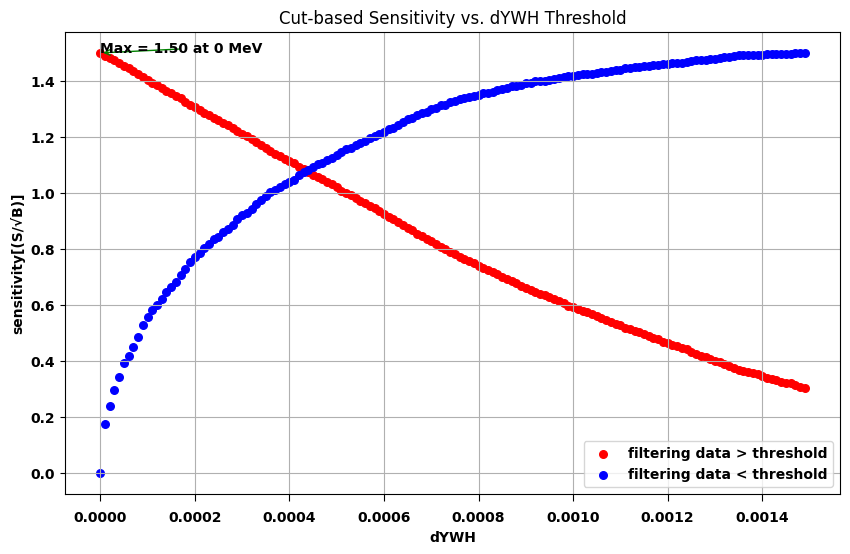

In [ ]:
def cutbase_sensitivity_dYWH(df):
  """
  using dYWH as variable to explore sensitivity increased
  after applying cut with two different regions.

  Input:
    df: Dataframe containing dYWH data needed
  Output:
    A plot showing the sensitivity vs cutting parameters
  """
  # create two empty arrays for storing sensitivity values
  sensitivity_dYWH = []
  sensitivity_inv_dYWH = []

  # create data set for dYWH
  dYWH_values = np.arange(0,1.5,0.01)

  for i in dYWH_values:
    # copy data
    df_copy = df.copy()
    # filter data larger than threshold
    df_copy = df_copy.loc[df_copy['dYWH'] > i]
    sensitivity_dYWH.append(sensitivity_cut_based(df_copy))

  for i in dYWH_values:
    # copy data
    df_copy = df.copy()
    # filter data smaller than threshold
    df_copy = df_copy.loc[df_copy['dYWH'] < i]
    sensitivity_inv_dYWH.append(sensitivity_cut_based(df_copy))

  sensitivity_dYWH = np.array(sensitivity_dYWH)
  sensitivity_inv_dYWH = np.array(sensitivity_inv_dYWH)

  # filter useless data due to 0 background event
  indic_sensitivity_dYWH = np.isfinite(sensitivity_dYWH)
  sensitivity_dYWH_filtered = sensitivity_dYWH[indic_sensitivity_dYWH]
  value_dYWH_filtered = dYWH_values[indic_sensitivity_dYWH]

  # filter useless data due to 0 background event for inverted
  indic_sensitivity_inv_dYWH = np.isfinite(sensitivity_inv_dYWH)
  sensitivity_inv_dYWH_filtered = sensitivity_inv_dYWH[indic_sensitivity_inv_dYWH]
  value_dYWH_inv_filtered = dYWH_values[indic_sensitivity_inv_dYWH]

  # find the maximum sensitivity
  max_sensitivity_dYWH = np.max(sensitivity_dYWH_filtered)
  max_sensitivity_thre_dYWH = value_dYWH_filtered[np.argmax(sensitivity_dYWH_filtered)]

  # find the maximum sensitivity for inverted
  max_sensitivity_inv_dYWH = np.max(sensitivity_inv_dYWH_filtered)
  max_sensitivity_thre_dYWH_inv = value_dYWH_inv_filtered[np.argmax(sensitivity_inv_dYWH_filtered)]

  print(f"Max snesitivity for is:{max_sensitivity_dYWH}")
  print(f"Corresponding dYWH threshold is:{max_sensitivity_thre_dYWH/1e3} GeV")
  print("--------------------------------------------")
  print(f"Max inverted snesitivity for is:{max_sensitivity_inv_dYWH}")
  print(f"Corresponding dYWH threshold is:{max_sensitivity_thre_dYWH_inv/1e3} GeV")
  print("\n")

  # plot sensitivity versus dYWH data
  plt.figure(figsize=(10,6))

  # add a green arrow to point highest sensitivity
  plt.annotate(f"Max = {max_sensitivity_dYWH:.2f} at {max_sensitivity_thre_dYWH/1e3:.0f} MeV",
             xy=(max_sensitivity_thre_dYWH/1e3, max_sensitivity_dYWH),
             arrowprops=dict(arrowstyle="->", color='green'))

  plt.scatter(dYWH_values/1e3,sensitivity_dYWH,s=30,label='filtering data > threshold',color='red')
  plt.scatter(dYWH_values/1e3,sensitivity_inv_dYWH,s=30,label='filtering data < threshold',color='blue')
  plt.xlabel('dYWH')
  plt.ylabel('sensitivity[(S/√B)]')
  plt.title('Cut-based Sensitivity vs. dYWH Threshold')
  plt.legend()
  plt.grid(True)
  plt.show()

  best_results.append(("dYWH", max_sensitivity_dYWH, max_sensitivity_thre_dYWH,max_sensitivity_inv_dYWH,max_sensitivity_thre_dYWH_inv))

# call function to apply cuts
cutbase_sensitivity_dYWH(df_original)

## 1.6. Conclusion for five one-variable cut in Part 1:


In [ ]:
# Sort highest three sensitivities and sort for three variable cutting
best_results.sort(key=lambda x: x[1], reverse=True)
top_three = best_results[:3]

# print with a proper format
pd.DataFrame(top_three, columns=["Variable", "Max Sensitivity", "Threshold","Max Sensitivity inverted", "Threshold inverted"])

,Variable,Max Sensitivity,Threshold,Max Sensitivity inverted,Threshold inverted
0,Mtop,1.832671,209000,1.137784,299000
1,pTV,1.521959,170000,1.215889,249000
2,pTB1,1.504866,90000,1.291635,198000


### As one can obviously observe from the table above, `Mtop with ">" threshold`; `pTV with ">" threshold `and` pTB1 with ">" threshold` are the three variables giving the highest sensitivity, thus these are used as **three-variable cut** for futher imporvement of cut-based method.

## 1.7. Three Variable Cut
*By applying the optimised cuts for Mtop, pTB1, and pTV, a baseline was established that significantly reduces the background while preserving the signal. The performance of this baseline is demonstrated through improvements in the mBB distribution and sensitivity metric.*

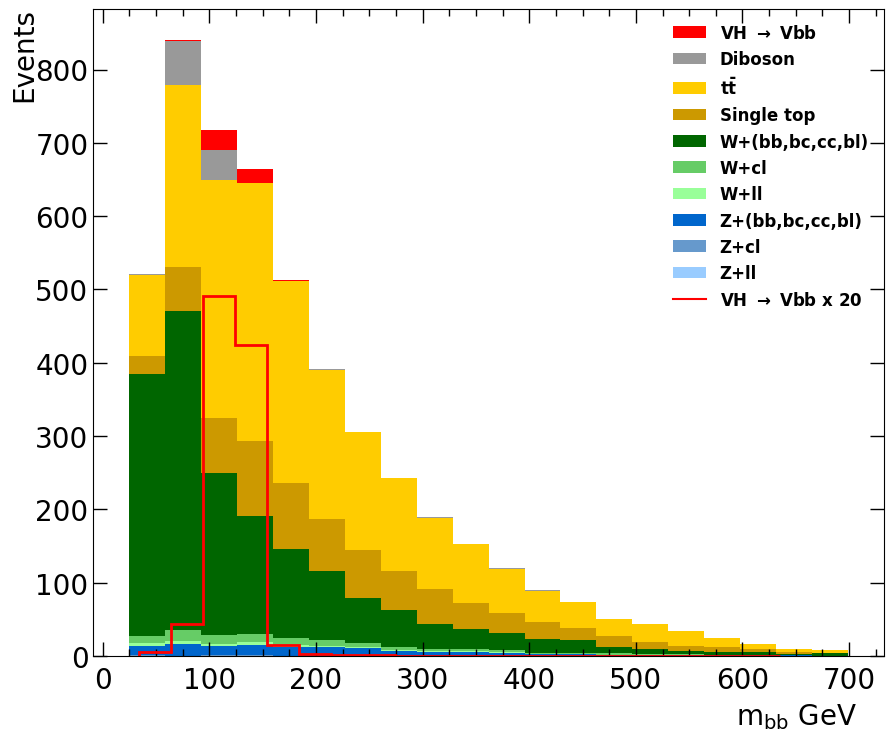

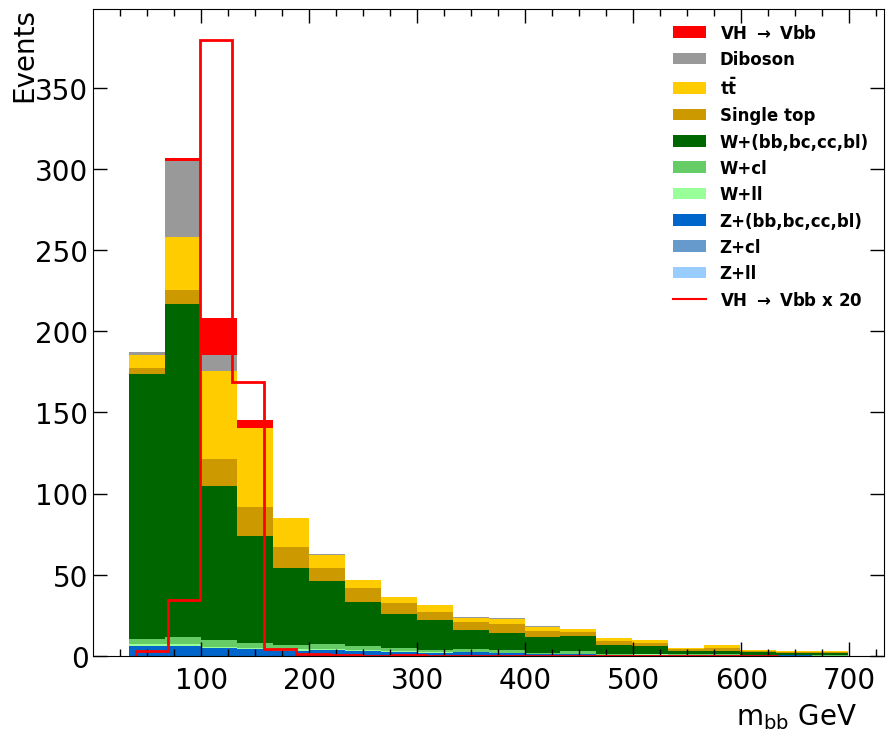

sensitivity achieved before cuts  1.4990772856082444
sensitivity achieved after cuts  1.832492568904024
sensitivity increased by 22.241367172773728%


In [ ]:
df = df.loc[df['Mtop'] > 209000]
df = df.loc[df['pTV'] > 170000]
df = df.loc[df['pTB1'] > 90000]

plot_variable(df_original,'mBB')
plot_variable(df,'mBB')
print("sensitivity achieved before cuts ",sensitivity_cut_based(df_original))
print("sensitivity achieved after cuts ",sensitivity_cut_based(df))
print(f"sensitivity increased by {(sensitivity_cut_based(df)-sensitivity_cut_based(df_original))/sensitivity_cut_based(df_original)*100}%")

# 2. Fourth Variable Cut Analysis
*Building on the three-variable baseline, detailed scans over the dRBB, MET and dYWH thresholds was performed in both "greater than" and "less than" directions. This trial investigates whether further improvements in sensitivity can be achieved by optimizing the cut on these variables.*

## 2.1. dRBB Analysis

/content/ucl_masterclass.py:537: RuntimeWarning: invalid value encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin
/content/ucl_masterclass.py:537: RuntimeWarning: divide by zero encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin


Max snesitivity for is:1.832492568904024
Corresponding dRBB threshold is:0.0
--------------------------------------------
Max inverted snesitivity for is:1.8766928356400192
Corresponding dRBB threshold is:1.45




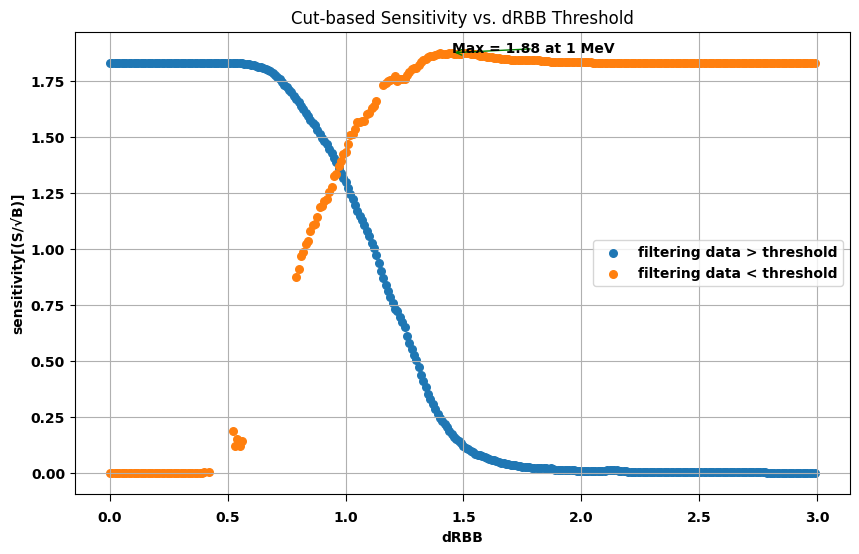

In [ ]:
# create a new array to store best sensitivities for fourth variable trial
best_results_4th = []

def cutbase_snesitivity_dRBB_4th(df):
  """
  using dRBB as variable to explore sensitivity increased
  after applying cut with two different regions after apply
  three-variable cut.

  Input:
  df: Dataframe containing pTB1 data needed
  Ouput:
  A plot showing the sensitivity vs cutting parameters
  """

  df = df.loc[df['Mtop'] > 209000]
  df = df.loc[df['pTV'] > 170000]
  df = df.loc[df['pTB1'] > 90000]

  # create two empty arrays for storing sensitivity values
  sensitivity_dRBB_4th = []
  sensitivity_inv_dRBB_4th = []

  # create data set for dRBB
  dRBB_values_4th = np.arange(0,3,0.01)

  for i in dRBB_values_4th:
    # copy data
    df_copy = df.copy()
    # filter data larger than threshold
    df_copy = df_copy.loc[df_copy['dRBB'] > i]
    sensitivity_dRBB_4th.append(sensitivity_cut_based(df_copy))

  for i in dRBB_values_4th:
    # copy data
    df_copy = df.copy()
    # filter data smaller than threshold
    df_copy = df_copy.loc[df_copy['dRBB'] < i]
    sensitivity_inv_dRBB_4th.append(sensitivity_cut_based(df_copy))

  sensitivity_dRBB_4th = np.array(sensitivity_dRBB_4th)
  sensitivity_inv_dRBB_4th = np.array(sensitivity_inv_dRBB_4th)

  # filter useless data due to 0 background event
  indic_sensitivity_dRBB_4th = np.isfinite(sensitivity_dRBB_4th)
  sensitivity_dRBB_filtered_4th = sensitivity_dRBB_4th[indic_sensitivity_dRBB_4th]
  value_dRBB_filtered_4th = dRBB_values_4th[indic_sensitivity_dRBB_4th]

  # filter useless data due to 0 background event for inverted threshold
  indic_sensitivity_inv_dRBB_4th = np.isfinite(sensitivity_inv_dRBB_4th)
  sensitivity_inv_dRBB_filtered_4th = sensitivity_inv_dRBB_4th[indic_sensitivity_inv_dRBB_4th]
  value_dRBB_inv_filtered_4th = dRBB_values_4th[indic_sensitivity_inv_dRBB_4th]

  # find the maximum sensitivity
  max_sensitivity_dRBB_4th = np.max(sensitivity_dRBB_filtered_4th)
  max_sensitivity_thre_dRBB_4th = value_dRBB_filtered_4th[np.argmax(sensitivity_dRBB_filtered_4th)]

  # find the maximum sensitivity for inverted
  max_sensitivity_inv_dRBB_4th = np.max(sensitivity_inv_dRBB_filtered_4th)
  max_sensitivity_thre_dRBB_inv_4th = value_dRBB_inv_filtered_4th[np.argmax(sensitivity_inv_dRBB_filtered_4th)]


  # print maximum snesitivity and corresponding threshold
  print(f"Max snesitivity for is:{max_sensitivity_dRBB_4th}")
  print(f"Corresponding dRBB threshold is:{max_sensitivity_thre_dRBB_4th}")
  print("--------------------------------------------")
  print(f"Max inverted snesitivity for is:{max_sensitivity_inv_dRBB_4th}")
  print(f"Corresponding dRBB threshold is:{max_sensitivity_thre_dRBB_inv_4th}")
  print("\n")

  # plot sensitivity versus dRBB data
  plt.figure(figsize=(10,6))

  # add a green arrow to point highest sensitivity
  plt.annotate(f"Max = {max_sensitivity_inv_dRBB_4th:.2f} at {max_sensitivity_thre_dRBB_inv_4th:.0f} MeV",
             xy=(max_sensitivity_thre_dRBB_inv_4th, max_sensitivity_inv_dRBB_4th),
             arrowprops=dict(arrowstyle="->", color='green'))

  plt.scatter(dRBB_values_4th,sensitivity_dRBB_4th,s=30,label='filtering data > threshold')
  plt.scatter(dRBB_values_4th,sensitivity_inv_dRBB_4th,s=30,label='filtering data < threshold')
  plt.xlabel('dRBB')
  plt.ylabel('sensitivity[(S/√B)]')
  plt.title('Cut-based Sensitivity vs. dRBB Threshold')
  plt.legend()
  plt.grid(True)
  plt.show()

  best_results_4th.append(("dRBB", max_sensitivity_dRBB_4th, max_sensitivity_thre_dRBB_4th,max_sensitivity_inv_dRBB_4th,max_sensitivity_thre_dRBB_inv_4th))
# call function to apply cuts
cutbase_snesitivity_dRBB_4th(df_original)

## 2.2. MET Analysis

Max sensitivity for is:1.833259945065218
Corresponding MET threshold is:8000
--------------------------------------------
Max inverted sensitivity for is:1.7083194572170153
Corresponding MET threshold is:198000




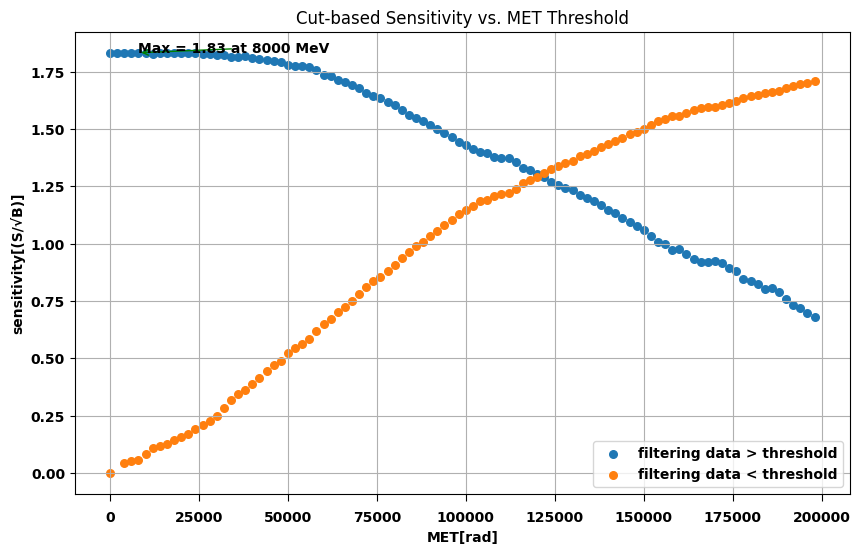

In [ ]:
def cutbase_sensitivity_MET_4th(df):
  """
  using MET as variable to explore sensitivity increased
  after applying cut with two different regions after applying
  three-variable cut.

  Input:
    df: Dataframe containing MET data needed
  Output:
    A plot showing the sensitivity vs cutting parameters
  """
  df = df.loc[df['Mtop'] > 209000]
  df = df.loc[df['pTV'] > 170000]
  df = df.loc[df['pTB1'] > 90000]

  # create two empty arrays for storing sensitivity values
  sensitivity_MET_4th = []
  sensitivity_inv_MET_4th = []

  # create data set for MET
  MET_values_4th = np.arange(0,200000,2000)

  for i in MET_values_4th:
    # copy data
    df_copy = df.copy()
    # filter data larger than threshold
    df_copy = df_copy.loc[df_copy['MET'] > i]
    sensitivity_MET_4th.append(sensitivity_cut_based(df_copy))

  for i in MET_values_4th:
    # copy data
    df_copy = df.copy()
    # filter data smaller than threshold
    df_copy = df_copy.loc[df_copy['MET'] < i]
    sensitivity_inv_MET_4th.append(sensitivity_cut_based(df_copy))

  sensitivity_MET_4th = np.array(sensitivity_MET_4th)
  sensitivity_inv_MET_4th = np.array(sensitivity_inv_MET_4th)

  # filter useless data due to 0 background event
  indic_sensitivity_MET_4th = np.isfinite(sensitivity_MET_4th)
  sensitivity_MET_filtered_4th = sensitivity_MET_4th[indic_sensitivity_MET_4th]
  value_MET_filtered_4th = MET_values_4th[indic_sensitivity_MET_4th]

  # filter useless data due to 0 background event for inverted threshold
  indic_sensitivity_inv_MET_4th = np.isfinite(sensitivity_inv_MET_4th)
  sensitivity_inv_MET_filtered_4th = sensitivity_inv_MET_4th[indic_sensitivity_inv_MET_4th]
  value_MET_inv_filtered_4th = MET_values_4th[indic_sensitivity_inv_MET_4th]

  # find the maximum sensitivity
  max_sensitivity_MET_4th = np.max(sensitivity_MET_filtered_4th)
  max_sensitivity_thre_MET_4th = value_MET_filtered_4th[np.argmax(sensitivity_MET_filtered_4th)]

  # find the maximum sensitivity for inverted
  max_sensitivity_inv_MET_4th = np.max(sensitivity_inv_MET_filtered_4th)
  max_sensitivity_thre_MET_inv_4th = value_MET_inv_filtered_4th[np.argmax(sensitivity_inv_MET_filtered_4th)]

  # print maximum sensitivity and corresponding threshold
  print(f"Max sensitivity for is:{max_sensitivity_MET_4th}")
  print(f"Corresponding MET threshold is:{max_sensitivity_thre_MET_4th}")
  print("--------------------------------------------")
  print(f"Max inverted sensitivity for is:{max_sensitivity_inv_MET_4th}")
  print(f"Corresponding MET threshold is:{max_sensitivity_thre_MET_inv_4th}")
  print("\n")

  # plot sensitivity versus MET data
  plt.figure(figsize=(10,6))

  # add a green arrow to point highest sensitivity
  plt.annotate(f"Max = {max_sensitivity_MET_4th:.2f} at {max_sensitivity_thre_MET_4th:.0f} MeV",
             xy=(max_sensitivity_thre_MET_4th, max_sensitivity_MET_4th),
             arrowprops=dict(arrowstyle="->", color='green'))

  plt.scatter(MET_values_4th,sensitivity_MET_4th,s=30,label='filtering data > threshold')
  plt.scatter(MET_values_4th,sensitivity_inv_MET_4th,s=30,label='filtering data < threshold')
  plt.xlabel('MET[rad]')
  plt.ylabel('sensitivity[(S/√B)]')
  plt.title('Cut-based Sensitivity vs. MET Threshold')
  plt.legend()
  plt.grid(True)
  plt.show()

  best_results_4th.append(("MET", max_sensitivity_MET_4th, max_sensitivity_thre_MET_4th,max_sensitivity_inv_MET_4th,max_sensitivity_thre_MET_inv_4th))

# call function to apply cuts
cutbase_sensitivity_MET_4th(df_original)

## 2.3. dYWH Analysis

Max sensitivity for is:1.832492568904024
Corresponding dYWH threshold is:0.0
--------------------------------------------
Max inverted sensitivity for is:1.8742673600190494
Corresponding dYWH threshold is:1.42




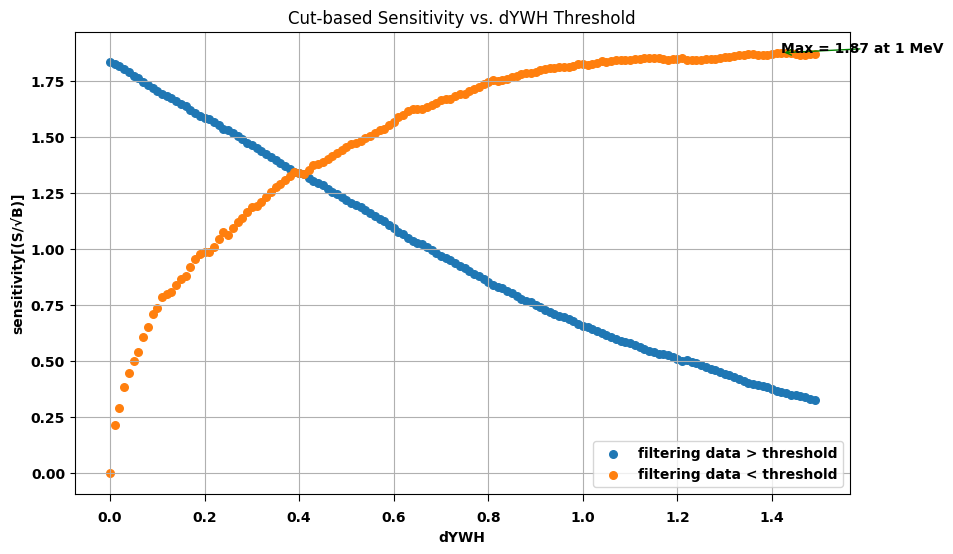

In [ ]:
def cutbase_sensitivity_dYWH_4th(df):
  """
  using dYWH as variable to explore sensitivity increased
  after applying cut with two different regions after applying
  three-variable cut.

  Input:
    df: Dataframe containing dYWH data needed
  Output:
    A plot showing the sensitivity vs cutting parameters
  """
  df = df.loc[df['Mtop'] > 209000]
  df = df.loc[df['pTV'] > 170000]
  df = df.loc[df['pTB1'] > 90000]

  # create two empty arrays for storing sensitivity values
  sensitivity_dYWH_4th = []
  sensitivity_inv_dYWH_4th = []

  # create data set for dYWH
  dYWH_values_4th = np.arange(0,1.5,0.01)

  for i in dYWH_values_4th:
    # copy data
    df_copy = df.copy()
    # filter data larger than threshold
    df_copy = df_copy.loc[df_copy['dYWH'] > i]
    sensitivity_dYWH_4th.append(sensitivity_cut_based(df_copy))

  for i in dYWH_values_4th:
    # copy data
    df_copy = df.copy()
    # filter data smaller than threshold
    df_copy = df_copy.loc[df_copy['dYWH'] < i]
    sensitivity_inv_dYWH_4th.append(sensitivity_cut_based(df_copy))

  sensitivity_dYWH_4th = np.array(sensitivity_dYWH_4th)
  sensitivity_inv_dYWH_4th = np.array(sensitivity_inv_dYWH_4th)

  # filter useless data due to 0 background event
  indic_sensitivity_dYWH_4th = np.isfinite(sensitivity_dYWH_4th)
  sensitivity_dYWH_filtered_4th = sensitivity_dYWH_4th[indic_sensitivity_dYWH_4th]
  value_dYWH_filtered_4th = dYWH_values_4th[indic_sensitivity_dYWH_4th]

  # filter useless data due to 0 background event for inverted threshold
  indic_sensitivity_inv_dYWH_4th = np.isfinite(sensitivity_inv_dYWH_4th)
  sensitivity_inv_dYWH_filtered_4th = sensitivity_inv_dYWH_4th[indic_sensitivity_inv_dYWH_4th]
  value_dYWH_inv_filtered_4th = dYWH_values_4th[indic_sensitivity_inv_dYWH_4th]

  # find the maximum sensitivity
  max_sensitivity_dYWH_4th = np.max(sensitivity_dYWH_filtered_4th)
  max_sensitivity_thre_dYWH_4th = value_dYWH_filtered_4th[np.argmax(sensitivity_dYWH_filtered_4th)]

  # find the maximum sensitivity for inverted
  max_sensitivity_inv_dYWH_4th = np.max(sensitivity_inv_dYWH_filtered_4th)
  max_sensitivity_thre_dYWH_inv_4th = value_dYWH_inv_filtered_4th[np.argmax(sensitivity_inv_dYWH_filtered_4th)]

  # print maximum sensitivity and corresponding threshold
  print(f"Max sensitivity for is:{max_sensitivity_dYWH_4th}")
  print(f"Corresponding dYWH threshold is:{max_sensitivity_thre_dYWH_4th}")
  print("--------------------------------------------")
  print(f"Max inverted sensitivity for is:{max_sensitivity_inv_dYWH_4th}")
  print(f"Corresponding dYWH threshold is:{max_sensitivity_thre_dYWH_inv_4th}")
  print("\n")

  # plot sensitivity versus dYWH data
  plt.figure(figsize=(10,6))

  # add a green arrow to point highest sensitivity
  plt.annotate(f"Max = {max_sensitivity_inv_dYWH_4th:.2f} at {max_sensitivity_thre_dYWH_inv_4th:.0f} MeV",
             xy=(max_sensitivity_thre_dYWH_inv_4th, max_sensitivity_inv_dYWH_4th),
             arrowprops=dict(arrowstyle="->", color='green'))

  plt.scatter(dYWH_values_4th,sensitivity_dYWH_4th,s=30,label='filtering data > threshold')
  plt.scatter(dYWH_values_4th,sensitivity_inv_dYWH_4th,s=30,label='filtering data < threshold')
  plt.xlabel('dYWH')
  plt.ylabel('sensitivity[(S/√B)]')
  plt.title('Cut-based Sensitivity vs. dYWH Threshold')
  plt.legend()
  plt.grid(True)
  plt.show()

  best_results_4th.append(("dYWH", max_sensitivity_dYWH_4th, max_sensitivity_thre_dYWH_4th,max_sensitivity_inv_dYWH_4th,max_sensitivity_thre_dYWH_inv_4th))

# call function to apply cuts
cutbase_sensitivity_dYWH_4th(df_original)

## 2.4. Conclusion for Fourth Variable Cut in Part2:

In [ ]:
# Sort highest three sensitivities and sort for fourth variable cutting
best_results_4th.sort(key=lambda x: x[1], reverse=True)
top_three_4th = best_results_4th[:3]

# print with a proper format
pd.DataFrame(top_three_4th, columns=["Variable", "Max Sensitivity", "Threshold","Max Sensitivity inverted", "Threshold inverted"])

,Variable,Max Sensitivity,Threshold,Max Sensitivity inverted,Threshold inverted
0,MET,1.833260,8000.0,1.708319,198000.00
1,dRBB,1.832493,0.0,1.876693,1.45
2,dYWH,1.832493,0.0,1.874267,1.42


### As one can observe from the table above, after applying **Mtop, pTV1, pTB** as first three cuts, the inverted threshold for **dRBB** at *1.45* gives the overall highest sensitivity *1.876693*.



# 3. Final Result for Cut Based Analysis
*Summerise above and apply best cuts to data set.*

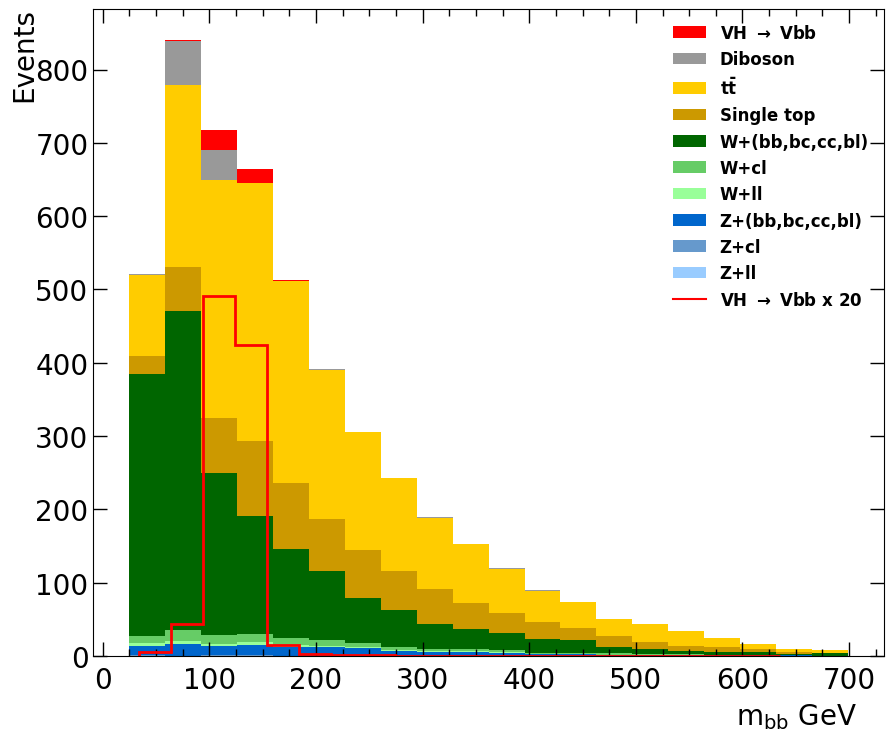

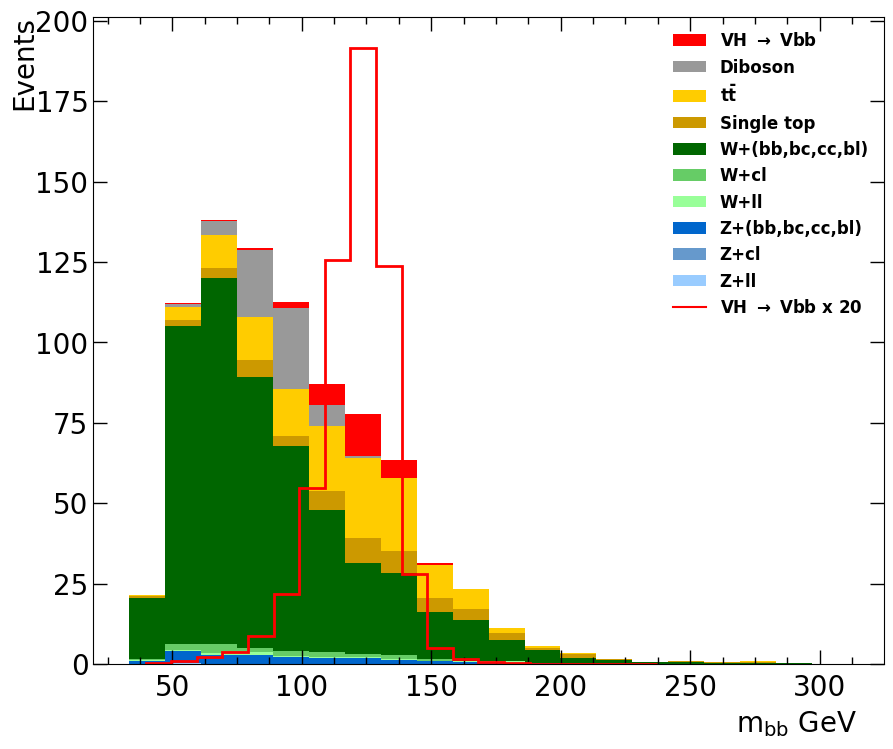

sensitivity achieved before cuts  1.4990772856082444
sensitivity achieved after cuts  1.8766928356400192
sensitivity increased by 25.18986536965363%


In [ ]:
df = df.loc[df['Mtop'] > 209000]
df = df.loc[df['pTV'] > 170000]
df = df.loc[df['pTB1'] > 90000]
df = df.loc[df['dRBB'] < 1.45]

plot_variable(df_original,'mBB')
plot_variable(df,'mBB')
print("sensitivity achieved before cuts ",sensitivity_cut_based(df_original))
print("sensitivity achieved after cuts ",sensitivity_cut_based(df))
print(f"sensitivity increased by {(sensitivity_cut_based(df)-sensitivity_cut_based(df_original))/sensitivity_cut_based(df_original)*100}%")

# Final Conclusion

In conclusion, the cut-based analysis shows that by applying carefully optimised threshold cuts on selected variables, the sensitivity for Higgs boson detection in the *H → bb̄* channel can be significantly improved. The three-variable baseline—utilising cuts on **Mtop, pTB1, and pTV**—boosted the sensitivity from **1.499** (pre-cuts) to **1.833**. The additional fourth variable trial on **dRBB** provided further evidence of potential gains in sensitivity from **1.499** (pre-cuts) to **1.876**, emphasising the importance of thorough variable optimisation. These findings validate the effectiveness of the cut-based method as a baseline analysis technique and lay a solid foundation for future enhancements using machine learning methods.